# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["jet.png", "kw.png", "moon.png", "lenaSzum.png", "lena.png", "plansza.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)



In [2]:
def filter_avg(I, size):
    kernel = np.ones((size, size), np.float32)/ (size ** 2)
    return cv2.filter2D(I, ddepth=-1, kernel=kernel, borderType=cv2.BORDER_REPLICATE)

def plot_with_diff(I1, I2, t1="Original", t2=''):
    fig, axs = plt.subplots(1, 3)
    n = 4
    fig.set_size_inches(3 * n, n)

    axs[0].imshow(I1, 'gray', vmin=0, vmax=256)
    axs[0].axis('off')
    axs[0].title.set_text(t1)

    axs[1].imshow(I2, 'gray', vmin=0, vmax=256)
    axs[1].axis('off')
    axs[1].title.set_text(t2)

    diff = np.abs(I1 - I2)
    axs[2].imshow(diff, 'gray', vmin=0, vmax=256)
    axs[2].axis('off')
    axs[2].title.set_text("Difference")

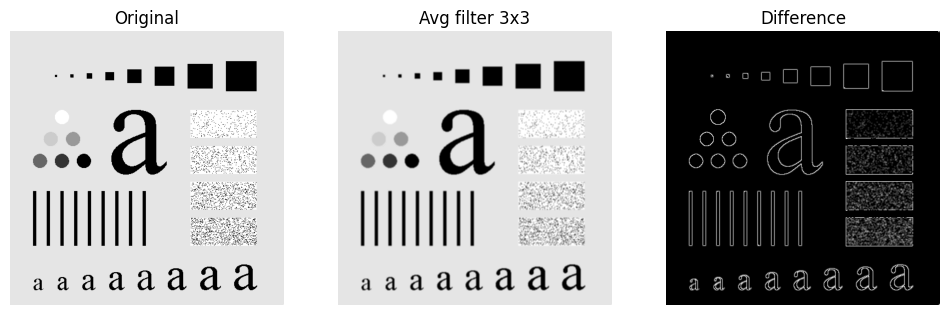

In [3]:
I = cv2.imread('plansza.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

filtered_3 = filter_avg(I, 3)
plot_with_diff(I, filtered_3, t2="Avg filter 3x3")

# filtracja dolnoprzepustowa rozmywa krawędzie

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

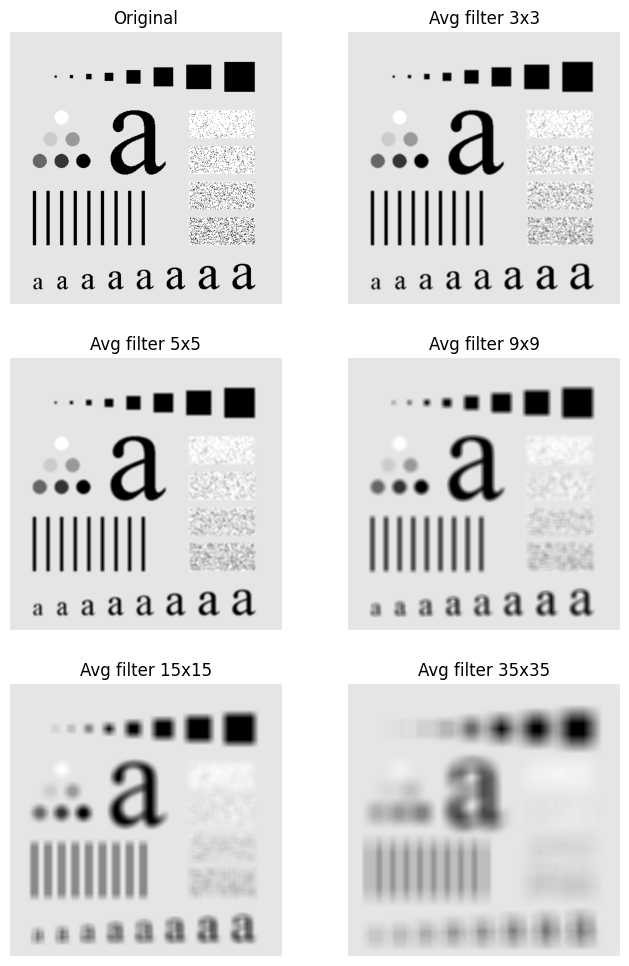

In [4]:
mask_sizes = [[None, 3],
              [5, 9],
              [15, 35]]

fig, axs = plt.subplots(3, 2)
n = 4
fig.set_size_inches(2 * n, 3 * n)
for x in range(3):
    for y in range(2):
        if x == 0 and y == 0:
            img = I
            t = "Original"
        else:
            img = filter_avg(I, mask_sizes[x][y])
            t = f"Avg filter {mask_sizes[x][y]}x{mask_sizes[x][y]}"
        axs[x][y].imshow(img, 'gray', vmin=0, vmax=256)
        axs[x][y].axis('off')
        axs[x][y].title.set_text(t)


6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

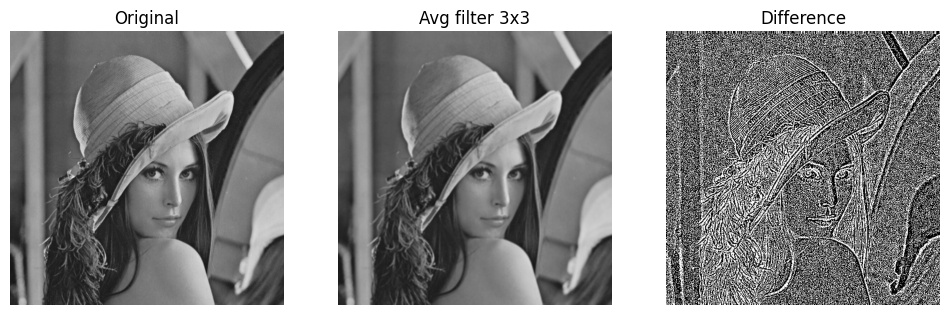

In [5]:
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

filtered = filter_avg(lena, 3)
plot_with_diff(lena, filtered, t2="Avg filter 3x3")

# utrata ostrości

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

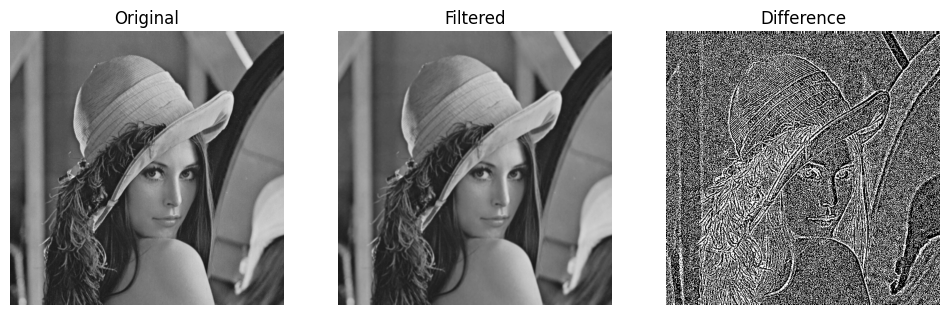

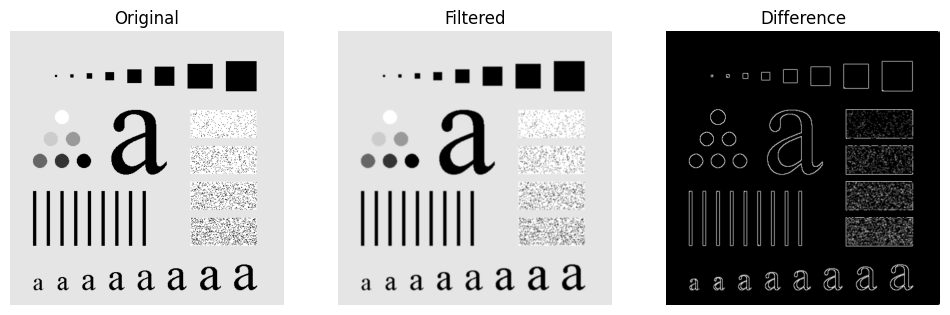

In [6]:
M = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
M = M / np.sum((np.sum(M)))

filtered = cv2.filter2D(lena, ddepth=-1, kernel=M, borderType=cv2.BORDER_REPLICATE)
plot_with_diff(lena, filtered, t2="Filtered")

filtered = cv2.filter2D(I, ddepth=-1, kernel=M, borderType=cv2.BORDER_REPLICATE)
plot_with_diff(I, filtered, t2="Filtered")

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


In [7]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 

def mesh(fun, size):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
#     ax = fig.gca(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()

Sigma: 0.5


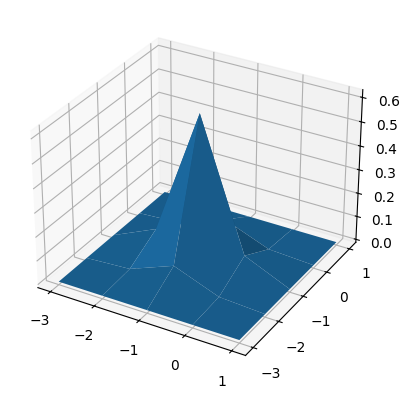

Sigma: 0.8


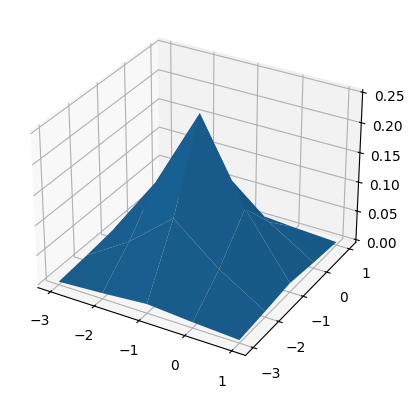

Sigma: 2


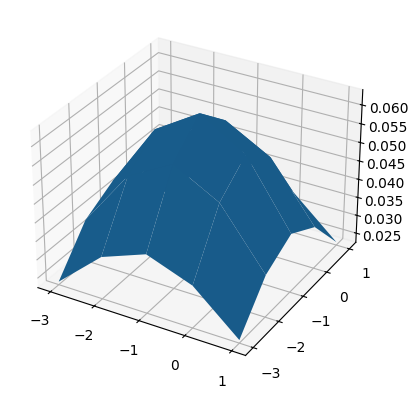

In [8]:
for sigma in [0.5, 0.8, 2]:
    print(f"Sigma: {sigma}")
    mask = fgaussian(5, sigma)
    mesh(mask, 5)

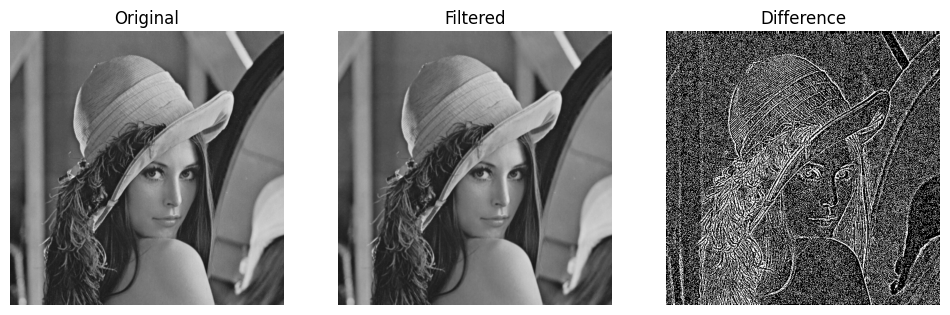

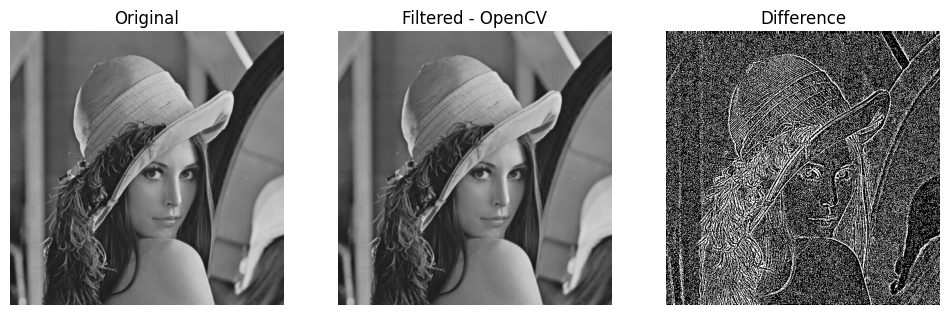

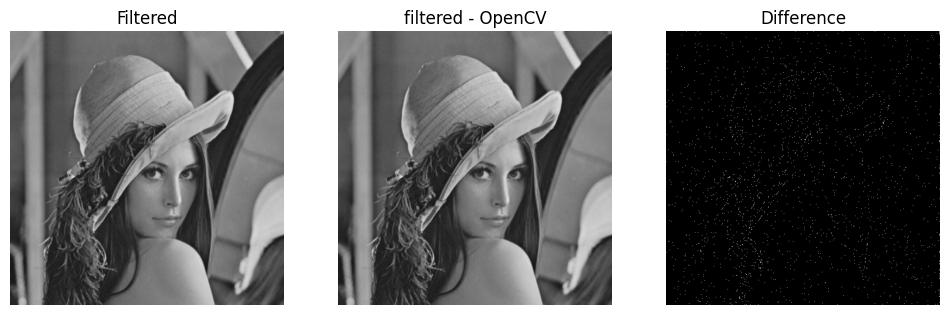

In [9]:
# porównanie

mask = fgaussian(5, 0.5)

filtered1 = cv2.filter2D(lena, ddepth=-1, kernel=mask, borderType=cv2.BORDER_REPLICATE)
plot_with_diff(lena, filtered1, t2="Filtered")

filtered2 = cv2.GaussianBlur(lena, (5, 5), 0.5) 
plot_with_diff(lena, filtered2, t2="Filtered - OpenCV")
plot_with_diff(filtered1, filtered2, t1="Filtered", t2="filtered - OpenCV")

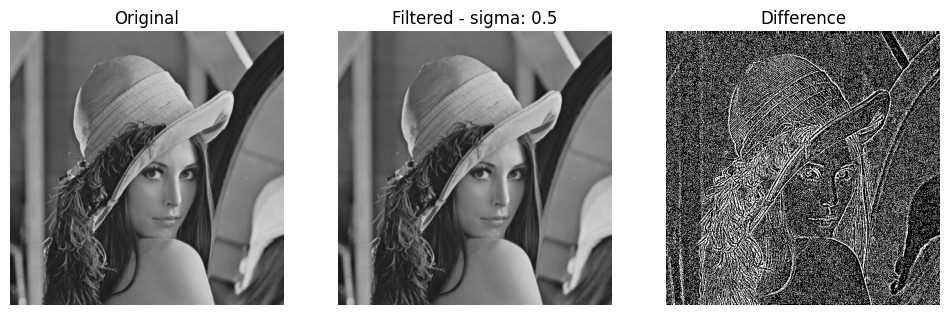

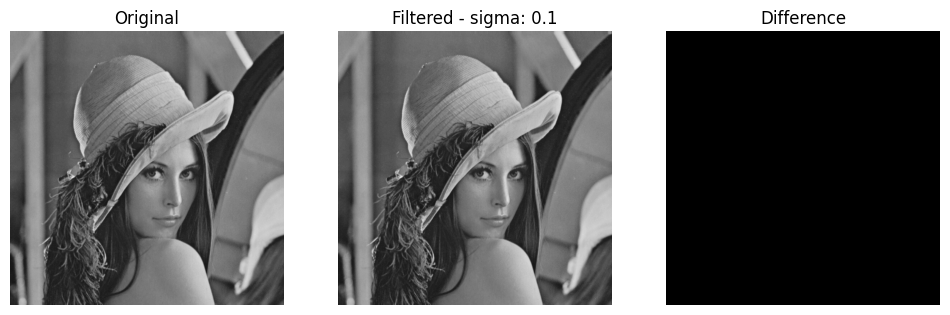

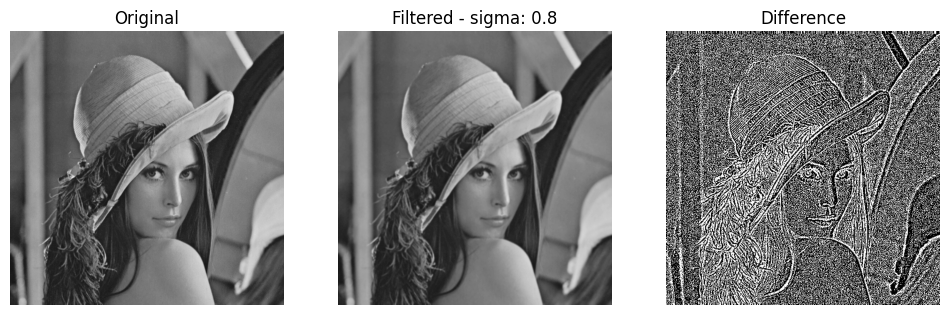

In [10]:
# 10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.
for sigma in [0.5, 0.1, 0.8]:
    mask = fgaussian(5, sigma)
    filtered = cv2.filter2D(lena, ddepth=-1, kernel=mask, borderType=cv2.BORDER_REPLICATE)
    plot_with_diff(lena, filtered, t2=f"Filtered - sigma: {sigma}")

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


In [11]:
lena2 = cv2.imread('lenaSzum.png')
lena2 = cv2.cvtColor(lena2, cv2.COLOR_BGR2GRAY)

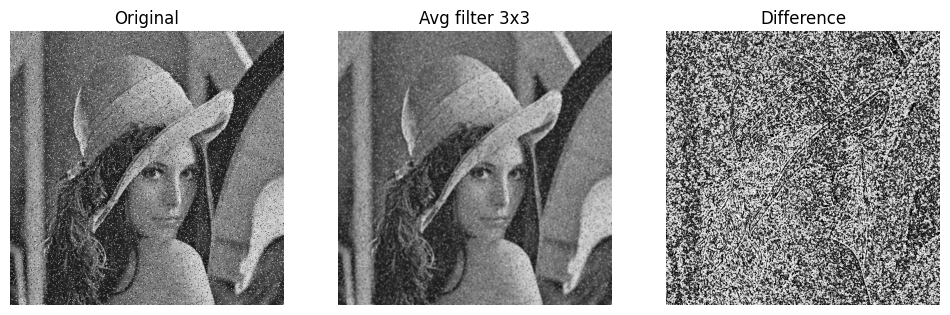

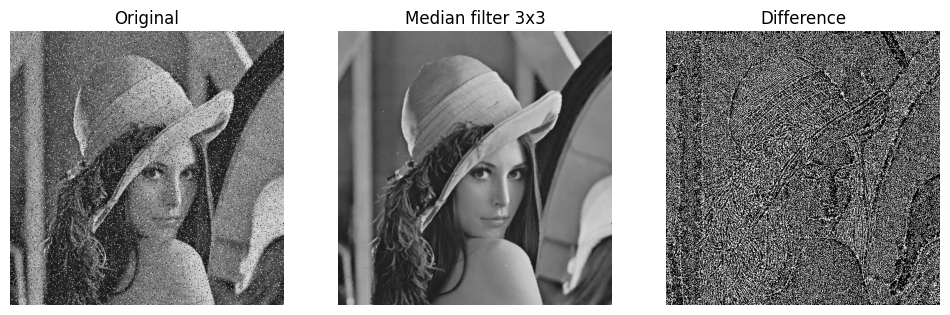

In [12]:
filtered_avg = filter_avg(lena2, 3)
plot_with_diff(lena2, filtered_avg, t2=f"Avg filter 3x3")

filtered_med = cv2.medianBlur(lena2, 3)
plot_with_diff(lena2, filtered_med, t2=f"Median filter 3x3")

# lepiej z szumem radzi sobie filtr medianowy

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

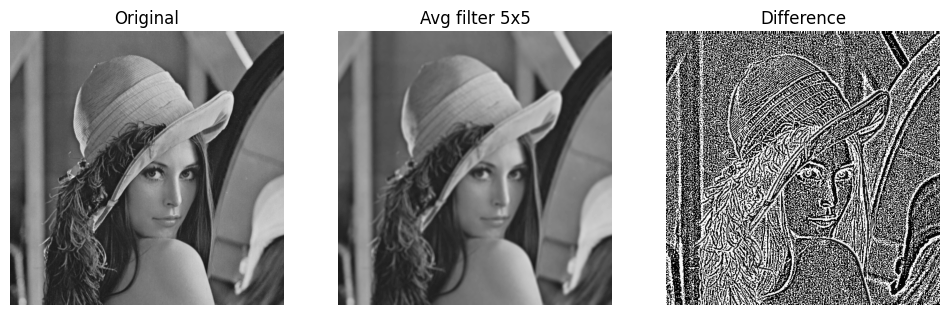

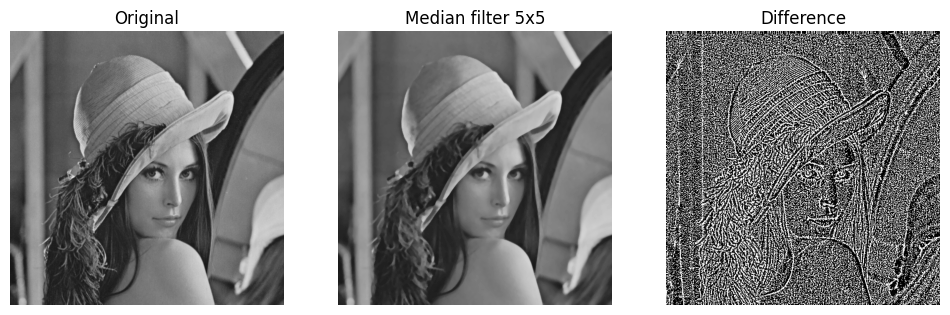

In [13]:
size = 5
filtered_avg = filter_avg(lena, size)
plot_with_diff(lena, filtered_avg, t2=f"Avg filter {size}x{size}")

filtered_med = cv2.medianBlur(lena, size)
plot_with_diff(lena, filtered_med, t2=f"Median filter {size}x{size}")

# krawędzie zostają lepiej zachowane dla filtracji medianowej

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).

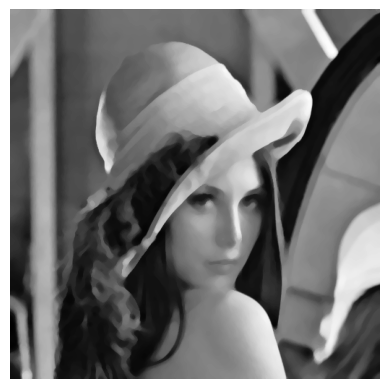

In [14]:
lena_med = lena
for i in range(10):
    lena_med = cv2.medianBlur(lena_med, 5)
plt.imshow(lena_med, 'gray')
plt.axis('off')
plt.show()

Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

In [15]:
moon = cv2.imread('moon.png')
moon = cv2.cvtColor(moon, cv2.COLOR_BGR2GRAY)

M = np.array([[0, 1, 0],
              [1, -4, 1],
              [0, 1, 0]])

# normalizacja
# M = M / 9

In [16]:
# check
def normalize_scale(I):
    return I + 128

def normalize_abs(I):
    return np.abs(I)

def plot_two(I1, I2, t1="Orginal", t2=""):
    fig, axs = plt.subplots(1, 2)
    n = 4
    fig.set_size_inches(2 * n, n)

    axs[0].imshow(I1, 'gray', vmin=0, vmax=256)
    axs[0].axis('off')
    axs[0].title.set_text(t1)

    axs[1].imshow(I2, 'gray', vmin=0, vmax=256)
    axs[1].axis('off')
    axs[1].title.set_text(t2)

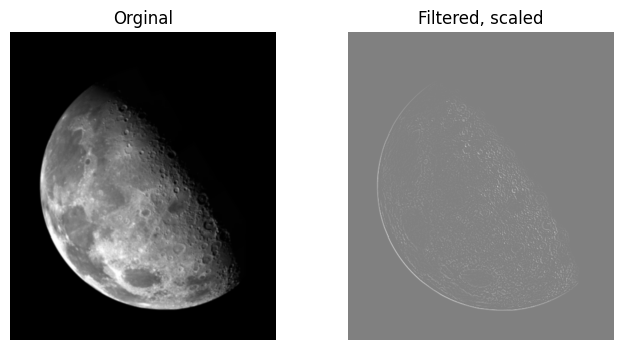

In [17]:
filtered = normalize_scale(cv2.filter2D(moon, ddepth=-1, kernel=M, borderType=cv2.BORDER_REPLICATE))
plot_two(moon, filtered, t2="Filtered, scaled")


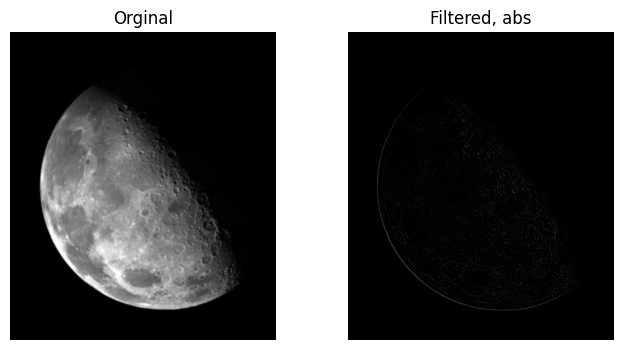

In [18]:
filtered = normalize_abs(cv2.filter2D(moon, ddepth=-1, kernel=M, borderType=cv2.BORDER_REPLICATE))
plot_two(moon, filtered, t2="Filtered, abs")


7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



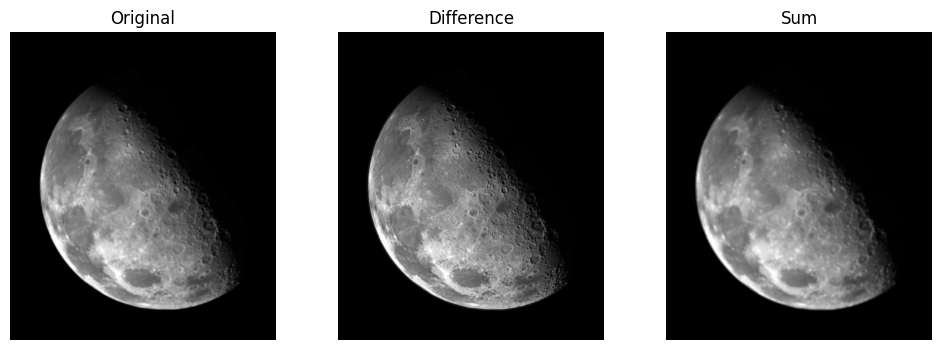

In [19]:
filtered = normalize_abs(cv2.filter2D(moon, ddepth=-1, kernel=M, borderType=cv2.BORDER_REPLICATE))
fig, axs = plt.subplots(1, 3)
n = 4
fig.set_size_inches(3 * n, n)

axs[0].imshow(moon, 'gray', vmin=0, vmax=256)
axs[0].axis('off')
axs[0].title.set_text("Original")

axs[1].imshow(np.abs(moon.astype(np.int32) - filtered) , 'gray', vmin=0, vmax=256)
axs[1].axis('off')
axs[1].title.set_text("Difference")

axs[2].imshow(moon.astype(np.int32) + filtered, 'gray', vmin=0, vmax=256)
axs[2].axis('off')
axs[2].title.set_text("Sum")

# lepsza różnica

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

In [20]:
kw = cv2.imread('kw.png')
kw = cv2.cvtColor(kw, cv2.COLOR_BGR2GRAY)

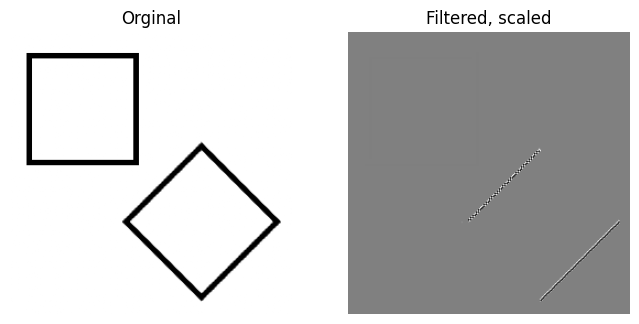

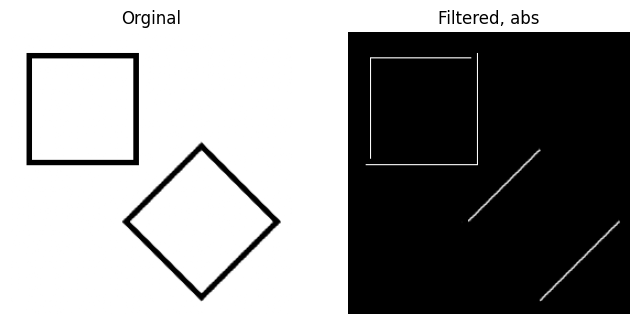

In [21]:
R1 = np.array([[0, 0, 0],
              [-1, 0, 0],
              [0, 1, 0]])

filtered = normalize_scale(cv2.filter2D(kw, ddepth=-1, kernel=R1, borderType=cv2.BORDER_REPLICATE))
plot_two(kw, filtered, t2="Filtered, scaled")

filtered = normalize_abs(cv2.filter2D(kw, ddepth=-1, kernel=R1, borderType=cv2.BORDER_REPLICATE))
plot_two(kw, filtered, t2="Filtered, abs")


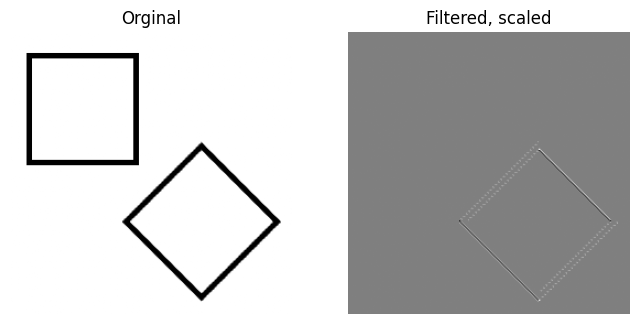

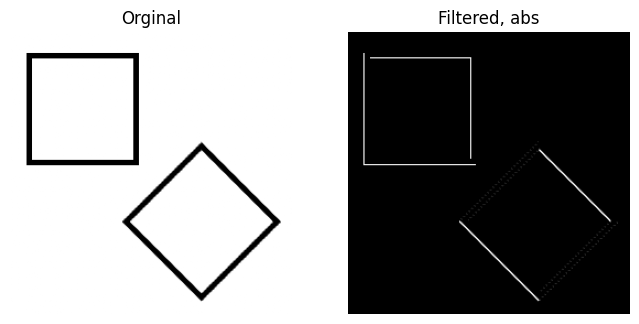

In [22]:
R2 = np.array([[0, 0, 0],
              [0, 0, -1],
              [0, 1, 0]])

filtered = normalize_scale(cv2.filter2D(kw, ddepth=-1, kernel=R2, borderType=cv2.BORDER_REPLICATE))
plot_two(kw, filtered, t2="Filtered, scaled")

filtered = normalize_abs(cv2.filter2D(kw, ddepth=-1, kernel=R2, borderType=cv2.BORDER_REPLICATE))
plot_two(kw, filtered, t2="Filtered, abs")


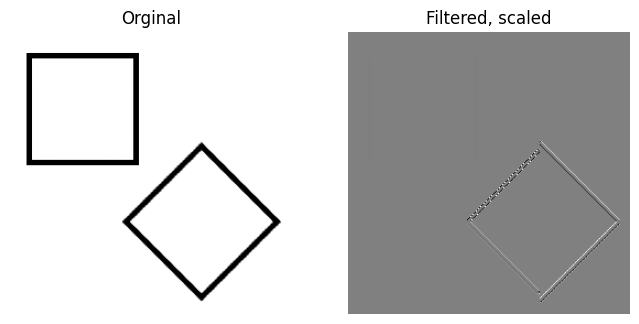

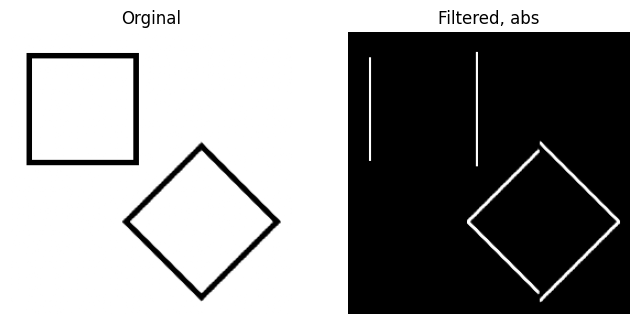

In [23]:
P1 = np.array([[-1, 0, 1],
              [-1, 0, 1],
              [-1, 0, 1]])

filtered = normalize_scale(cv2.filter2D(kw, ddepth=-1, kernel=P1, borderType=cv2.BORDER_REPLICATE))
plot_two(kw, filtered, t2="Filtered, scaled")

filtered = normalize_abs(cv2.filter2D(kw, ddepth=-1, kernel=P1, borderType=cv2.BORDER_REPLICATE))
plot_two(kw, filtered, t2="Filtered, abs")


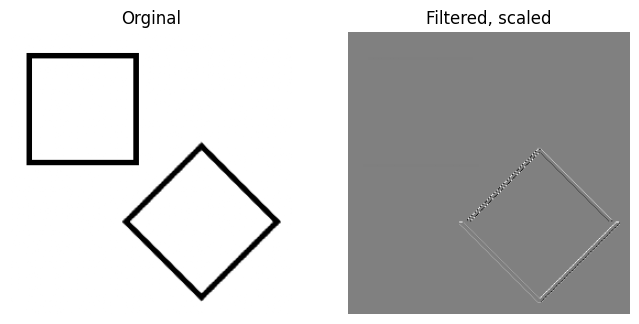

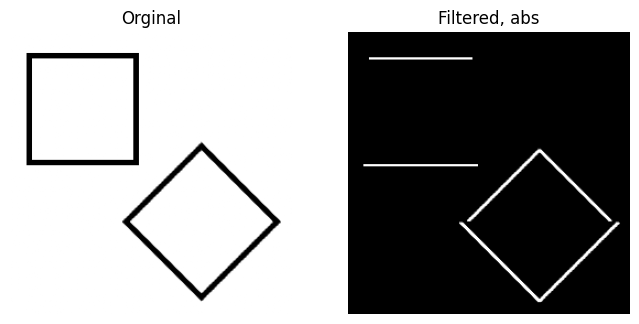

In [24]:
P2 = np.array([[-1, -1, -1],
              [0, 0, 0],
              [1, 1, 1]])

filtered = normalize_scale(cv2.filter2D(kw, ddepth=-1, kernel=P2, borderType=cv2.BORDER_REPLICATE))
plot_two(kw, filtered, t2="Filtered, scaled")

filtered = normalize_abs(cv2.filter2D(kw, ddepth=-1, kernel=P2, borderType=cv2.BORDER_REPLICATE))
plot_two(kw, filtered, t2="Filtered, abs")

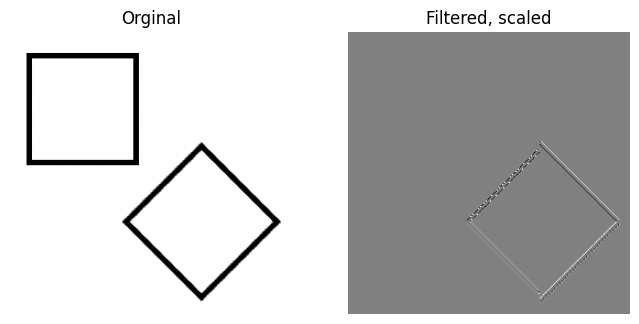

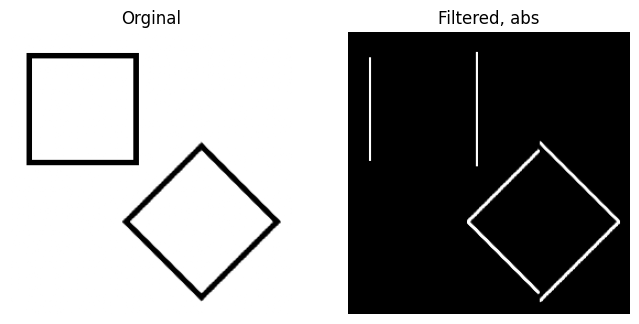

In [25]:
S1 = np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 1]])

filtered = normalize_scale(cv2.filter2D(kw, ddepth=-1, kernel=S1, borderType=cv2.BORDER_REPLICATE))
plot_two(kw, filtered, t2="Filtered, scaled")

filtered = normalize_abs(cv2.filter2D(kw, ddepth=-1, kernel=S1, borderType=cv2.BORDER_REPLICATE))
plot_two(kw, filtered, t2="Filtered, abs")

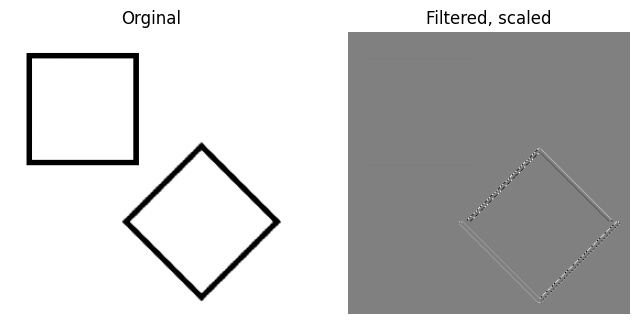

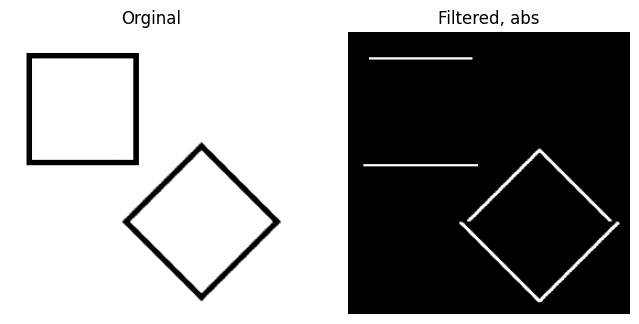

In [26]:
S2 = np.array([[-1, -2, -1],
              [0, 0, 0],
              [1, 2, 1]])

filtered = normalize_scale(cv2.filter2D(kw, ddepth=-1, kernel=S2, borderType=cv2.BORDER_REPLICATE))
plot_two(kw, filtered, t2="Filtered, scaled")

filtered = normalize_abs(cv2.filter2D(kw, ddepth=-1, kernel=S2, borderType=cv2.BORDER_REPLICATE))
plot_two(kw, filtered, t2="Filtered, abs")

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



In [27]:
def combined_sqrt(I, S1, S2):
    I1 = cv2.filter2D(I, ddepth=-1, kernel=S1, borderType=cv2.BORDER_REPLICATE)
    I2 = cv2.filter2D(I, ddepth=-1, kernel=S2, borderType=cv2.BORDER_REPLICATE)

    OW = np.sqrt(np.power(I1.astype(np.int32), 2) + np.power(I2.astype(np.int32), 2))
    plot_two(I, OW, t2="Combined filter - sqrt")

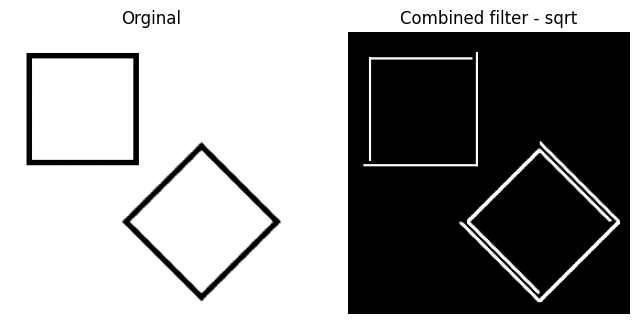

In [28]:
combined_sqrt(kw, S1, S2)

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

In [29]:
def combined_abs(I, S1, S2):
    I1 = cv2.filter2D(I, ddepth=-1, kernel=S1, borderType=cv2.BORDER_REPLICATE)
    I2 = cv2.filter2D(I, ddepth=-1, kernel=S2, borderType=cv2.BORDER_REPLICATE)

    OW = np.abs(I1.astype(np.int32)) + np.abs(I2.astype(np.int32))
    plot_two(I, OW, t2="Combined filter - abs")

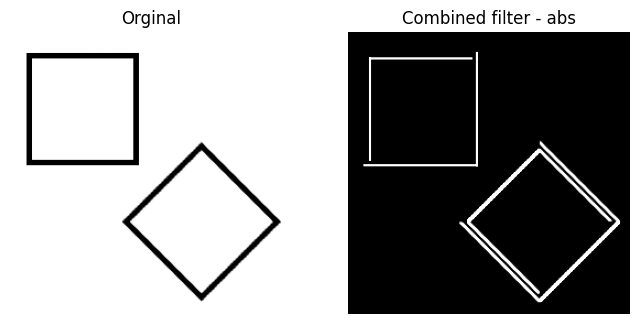

In [30]:
combined_abs(kw, S1, S2)

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

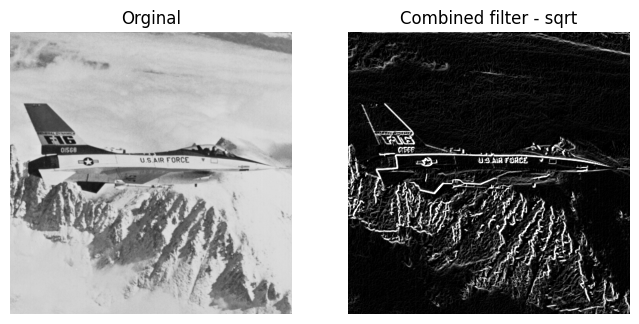

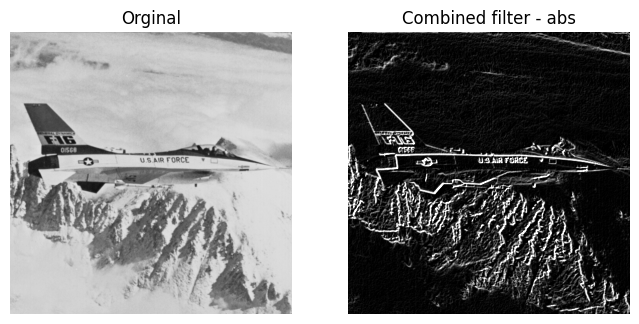

In [31]:
jet = cv2.imread('jet.png')
jet = cv2.cvtColor(jet, cv2.COLOR_BGR2GRAY)

combined_sqrt(jet, S1, S2)
combined_abs(jet, S1, S2)
